<h1><center>AI Launch Lab - Student Extracurriculars Project</center></h1>

## Step 1: Defining our Problem and Scope

### Problem definition:
A classification model that provides school club recommendations to students
based on past student data aimed to help students better integrate in the school community and improve themselves.

### Target audience:
* Students can use this to find what they are likely to enjoy

* Schools can use this to recommend activities to students

### Scope and constraints:
* We will only be analyzing the ten data fields found in our dataset with a focus on making a classification model

* Club recommendations will be very general, given the data (e.g. "Art Club" or "Sports Team")

* Later, we could implement:

    * Language models for more natural/human results

    * Bias study by hiding certain data fields and see how it affects results
    
    * School specific datasets compatibility
    
### Success criteria:
We're going to use a cross-entropy loss function to examine how well our model performs.

## Step 2: Data Collection and Preparation

### Data source:

We are going to use a __[student extracurricular dataset](https://www.kaggle.com/datasets/kamakshilahoti/student-extracurriculars-info)__ from Kaggle.
We'll begin by exploring, and cleaning the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/noahvezina26/student-extracurriculars/refs/heads/main/student_extracurriculars.csv"

df = pd.read_csv(url)

df

,StudentID,Name,AcademicInterest,ExtracurricularActivities,Skills,Location,YearOfStudy,Major,GPA,Languages,ClubMemberships,ResearchInterests
0,1,Student 1,Psychology,Debate Club,Problem Solving,New York,Freshman,Psychology,3.27,"Chinese, Japanese, Spanish, German, French","Music Club, Art Club, Sports Team, Debate Club...",Biomedical Engineering
1,2,Student 2,Psychology,Debate Club,"Leadership, Problem Solving, Public Speaking, ...",Boston,Graduate,Physics,3.17,"French, English, Chinese, Spanish, Japanese","Art Club, Music Club, Sports Team, Coding Club",Urban Planning
2,3,Student 3,History,Volunteer Group,"Data Analysis, Leadership, Public Speaking, Ar...",Chicago,Junior,Biology,2.09,"Spanish, Japanese, German, French","Music Club, Art Club, Debate Club, Volunteer G...",Nanotechnology
3,4,Student 4,Computer Science,Volunteer Group,"Public Speaking, Data Analysis, Problem Solving",Chicago,Graduate,Biology,2.56,"Japanese, Chinese, Spanish, French","Sports Team, Volunteer Group",Space Exploration
4,5,Student 5,Computer Science,Sports Team,Data Analysis,Chicago,Graduate,Computer Science,2.01,English,"Sports Team, Volunteer Group, Music Club",Climate Change
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Student 996,History,Sports Team,"Leadership, Artistic, Programming, Public Spea...",Chicago,Freshman,Mathematics,2.21,"French, Chinese, English","Debate Club, Volunteer Group, Music Club, Spor...",Astrophysics
996,997,Student 997,Psychology,Art Club,"Data Analysis, Leadership",New York,Graduate,Biology,3.62,"Spanish, German, Chinese","Music Club, Volunteer Group, Coding Club, Art ...",Data Science
997,998,Student 998,Mathematics,Volunteer Group,"Public Speaking, Programming, Artistic, Leader...",New York,Junior,Biology,3.09,"Spanish, German, Japanese, Chinese, French","Art Club, Volunteer Group, Debate Club, Coding...",Space Exploration
998,999,Student 999,Physics,Sports Team,"Public Speaking, Data Analysis, Artistic, Lead...",Houston,Graduate,Psychology,3.17,German,"Coding Club, Sports Team, Music Club",Space Exploration


Taking a look at the dataframe, we can see that the first two columns are of no real value, essentially providing the row number of each row. Notice that columns like "Skills", "Languages", "ResearchInterests" or "ClubMemberships" contains multiple values and therefore count each value combination as a unique value. This is very hard to analyze and makes it difficult to comb through the data. Later, we will use multihot encoding to simplify these values, after some data exploration.

In [3]:
df.drop("StudentID", axis=1, inplace=True, errors='ignore')
df.drop("Name", axis=1, inplace=True, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcademicInterest           1000 non-null   object 
 1   ExtracurricularActivities  1000 non-null   object 
 2   Skills                     1000 non-null   object 
 3   Location                   1000 non-null   object 
 4   YearOfStudy                1000 non-null   object 
 5   Major                      1000 non-null   object 
 6   GPA                        1000 non-null   float64
 7   Languages                  1000 non-null   object 
 8   ClubMemberships            1000 non-null   object 
 9   ResearchInterests          1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.3+ KB


### Data attributes:

That leaves us with 1000 datapoints and 10 data attributes including:
* Academic Interest: field of study of the student
* Extracurricular Activities: extracurricular activities the student is involved in (outside of school)
* Skills: skills possessed by the student
* Location: city where student is based
* Year Of Study: year of study (e.g. Freshman, Junior, Senior, Graduate)
* Major: student's major
* GPA: grade point average of student
* Languages: languages spoken by the student
* Club Memberships: student's memberships in clubs (within the school community)
* Research Interests: specific interests of the students

Among these, GPA is the only numerical attribute whereas the rest are categorical.

### Data cleaning:

Let's check for duplicated rows and missing data:

In [4]:
print("Missing values per column:")
print(df.isnull().values.sum())

print()

print("Amount of duplicated rows:")
print(df.duplicated().sum())

Missing values per column:
0

Amount of duplicated rows:
0


Lastly, let's check how many unique values there are in each column. This ensures that everything is spelled and capitalized uniformly.

In [23]:
features = [feature for feature in df.columns]

for feature in features:
    if feature == "GPA":
        continue
    unique_values = df[feature].str.split(", ").explode().unique()
    print(f"Unique values of {feature} ({len(unique_values)}): {unique_values}")
print(f"Range of GPA: {df["GPA"].min()} - {df["GPA"].max()}")

Unique values of AcademicInterest (6): ['Psychology' 'History' 'Computer Science' 'Biology' 'Mathematics'
 'Physics']
Unique values of ExtracurricularActivities (6): ['Debate Club' 'Volunteer Group' 'Sports Team' 'Art Club' 'Coding Club'
 'Music Club']
Unique values of Skills (6): ['Problem Solving' 'Leadership' 'Public Speaking' 'Data Analysis'
 'Programming' 'Artistic']
Unique values of Location (6): ['New York' 'Boston' 'Chicago' 'Houston' 'Los Angeles' 'San Francisco']
Unique values of YearOfStudy (5): ['Freshman' 'Graduate' 'Junior' 'Senior' 'Sophomore']
Unique values of Major (6): ['Psychology' 'Physics' 'Biology' 'Computer Science' 'History'
 'Mathematics']
Unique values of Languages (6): ['Chinese' 'Japanese' 'Spanish' 'German' 'French' 'English']
Unique values of ClubMemberships (6): ['Music Club' 'Art Club' 'Sports Team' 'Debate Club' 'Coding Club'
 'Volunteer Group']
Unique values of ResearchInterests (25): ['Biomedical Engineering' 'Urban Planning' 'Nanotechnology'
 'Space 

Fortunately, everthing is spelled correctly and all the values names are uniform.

## Step 3: Exploratory Data Analysis

Now, let's take a look at some graphs of our data features:

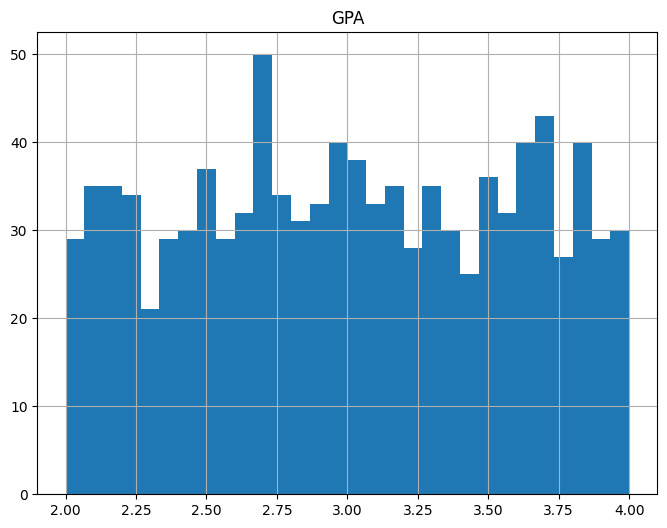

In [31]:
numerical_features = ["GPA"]
df[numerical_features].hist(bins=30, figsize=(8, 6))
plt.show()

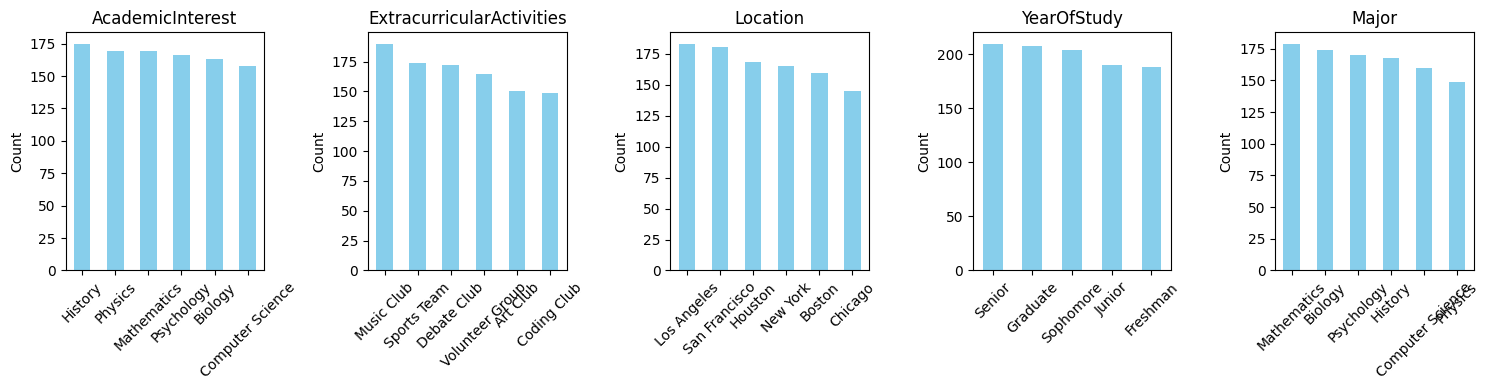

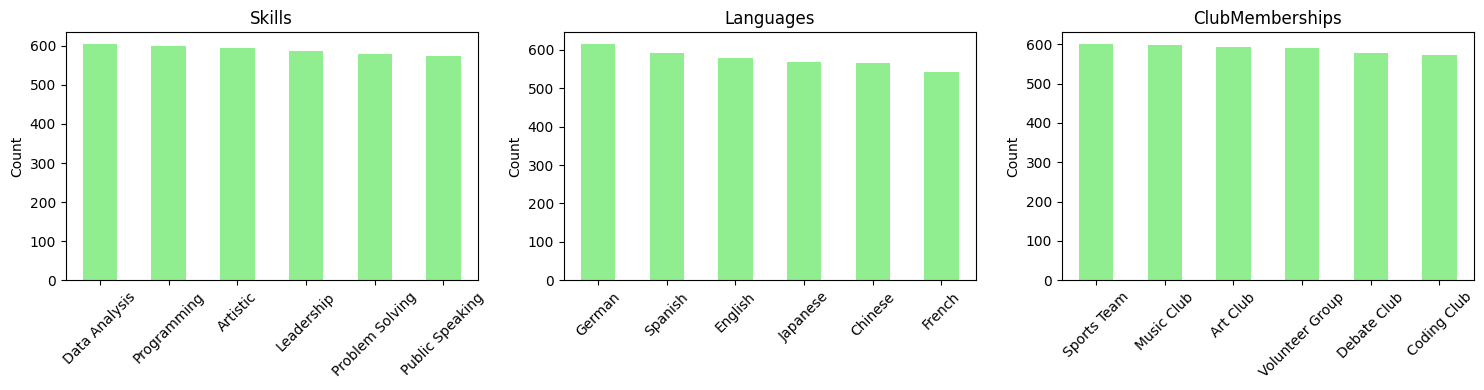

In [36]:
categorical_features = ["AcademicInterest", "ExtracurricularActivities", "Location", "YearOfStudy", "Major"]
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 4))
for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

multi_categorical_features = ["Skills", "Languages", "ClubMemberships"]
fig, axes = plt.subplots(1, len(multi_categorical_features), figsize=(15, 4))
for i, feature in enumerate(multi_categorical_features):
    exploded_feature = df[feature].str.split(", ").explode()
    exploded_feature.value_counts().plot(kind='bar', color='lightgreen', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()